In [83]:
#!/usr/bin/python

##############################################################################################################################################################################
# Copyright (c) 2017, Miroslav Stoyanov
#
# This file is part of
# Toolkit for Adaptive Stochastic Modeling And Non-Intrusive ApproximatioN: TASMANIAN
#
# Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions
#    and the following disclaimer in the documentation and/or other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse
#    or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES,
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY,
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA,
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
#
# UT-BATTELLE, LLC AND THE UNITED STATES GOVERNMENT MAKE NO REPRESENTATIONS AND DISCLAIM ALL WARRANTIES, BOTH EXPRESSED AND IMPLIED.
# THERE ARE NO EXPRESS OR IMPLIED WARRANTIES OF MERCHANTABILITY OR FITNESS FOR A PARTICULAR PURPOSE, OR THAT THE USE OF THE SOFTWARE WILL NOT INFRINGE ANY PATENT,
# COPYRIGHT, TRADEMARK, OR OTHER PROPRIETARY RIGHTS, OR THAT THE SOFTWARE WILL ACCOMPLISH THE INTENDED RESULTS OR THAT THE SOFTWARE OR ITS USE WILL NOT RESULT IN INJURY OR DAMAGE.
# THE USER ASSUMES RESPONSIBILITY FOR ALL LIABILITIES, PENALTIES, FINES, CLAIMS, CAUSES OF ACTION, AND COSTS AND EXPENSES, CAUSED BY, RESULTING FROM OR ARISING OUT OF,
# IN WHOLE OR IN PART THE USE, STORAGE OR DISPOSAL OF THE SOFTWARE.
##############################################################################################################################################################################
#
#
#  The examples below were adjusted for the OSE 19 lab at BFI Chicago.
#  Simon Scheidegger, 07/19
#
##############################################################################################################################################################################

# necessary import for every use of TASMANIAN
#
import TasmanianSG
import numpy as np
import matplotlib.pyplot as plt
# imports specifically needed by the examples
import math
from random import uniform
from datetime import datetime

print("TasmanianSG version: {0:s}".format(TasmanianSG.__version__))
print("TasmanianSG license: {0:s}".format(TasmanianSG.__license__))

grid  = TasmanianSG.TasmanianSparseGrid()
grid1 = TasmanianSG.TasmanianSparseGrid()
grid2 = TasmanianSG.TasmanianSparseGrid()


#############################################################################

# EXAMPLE 1 for OSM:
# interpolate: f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
# using piecewise linear basis functions.

# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
# iDim = dimension
iDim = 2
# iOut = number of output
iOut = 1
#iDepth = refinement level
iDepth = 5
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
print(type(grid))
aPoints = grid.getPoints()
#print(aPoints)
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid.loadNeededPoints(aVals)



# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()



TasmanianSG version: 4.0
TasmanianSG license: BSD 3-Clause

-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 5
       the error is estimated as the maximum from 1000 random points

<type 'instance'>
 For localp    Number of points: 145   Max. Error: 7.6776817717033596e-03


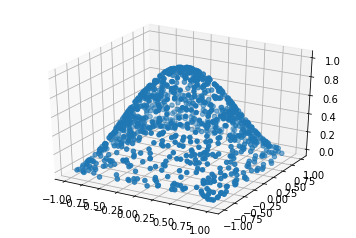


-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   
         1         9  3.06e-01
         2        14  2.40e-01
         3        27  2.11e-01
         4        58  2.10e-01
         5       125  1.81e-01
         6       276  5.42e-02
         7       611  2.19e-02
         8      1347  7.64e-03
         9      2951  2.39e-03
        10      6423  7.35e-04


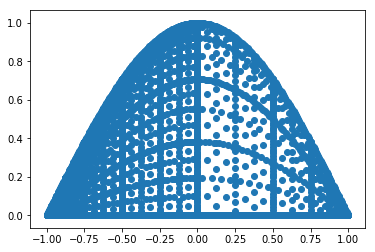


-------------------------------------------------------------------------------------------------
('   a fix sparse grid of level ', 11, ' would consist of ', 15361, ' points')

-------------------------------------------------------------------------------------------------



In [85]:
#############################################################################

## EXAMPLE 2 for OSM:
## interpolate: f(x,y) = exp(-x) / (1 + 100 * exp(-10 * y))
## using refinement
from mpl_toolkits import mplot3d

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

ax = plt.axes(projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aTres)
plt.show()

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 10

# level of grid before refinement
# .makeLocalPolynomialGrid = without adaptative
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid1.loadNeededPoints(aVals)


print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level

for iK in range(refinement_level):
    
    
    #fig, ax = plt.subplots()
    #ax.scatter(aPoints[:,0], aPoints[:,1])
    #plt.show()
    #grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp") for non-adaptative grid
    # First: get the grid & evaluation at the grid points ; compare to the actual value ; get the error
    # .setSurplusRefinement take the error computed before, choose new grid points by confronting error to fTol
    # refinement_level = how many times to do this
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    #print(aRes[0])
    #print(aTres[0])
    fError1 = max(np.fabs(aRes[:,0] - aTres))
    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()


fig, bx = plt.subplots()
bx.scatter(aPoints[:,0], aVals)
plt.show()

 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print( "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points")
print("\n-------------------------------------------------------------------------------------------------\n")    


### Gaussian with adaptative sparse grids

In [130]:
from mpl_toolkits import mplot3d

c = [1.0, 1.0]
w = [1.0, 1.0]
t = 1
# c=1
# w=1
# t=1

grid_nb = 50

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 10

aPnts = np.empty([grid_nb, 2])  
for iI in range(grid_nb):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

aTres = np.empty([grid_nb,])
for iI in range(grid_nb):
    aTres[iI] = np.exp(-(
        c[0]**2*t*(aPnts[iI][0] - w[0]) +
        c[1]**2*t*(aPnts[iI][1] - w[1])))
    #aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])




-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   
         1        11  1.20e+00
         2        22  4.72e-01
         3        49  1.51e-01
         4       111  4.52e-02
         5       251  6.26e-03
         6       563  1.79e-03
         7      1251  4.22e-04
         8      2755  1.11e-04
         9      6019  2.25e-05
        10     13059  6.55e-06


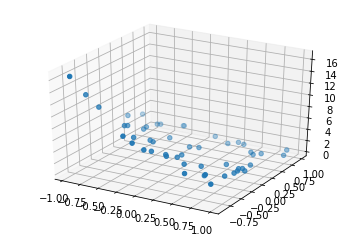

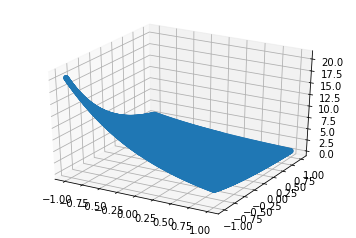


-------------------------------------------------------------------------------------------------
('   a fix sparse grid of level ', 11, ' would consist of ', 15361, ' points')

-------------------------------------------------------------------------------------------------



In [131]:



# level of grid before refinement
# .makeLocalPolynomialGrid = without adaptative
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    #aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
    aVals[iI] = np.exp(-(
        c[0]**2*t*(aPoints[iI,0] - w[0]) +
        c[1]**2*t*(aPoints[iI,1] - w[1])))

grid1.loadNeededPoints(aVals)


print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level

for iK in range(refinement_level):
    
    
    #fig, ax = plt.subplots()
    #ax.scatter(aPoints[:,0], aPoints[:,1])
    #plt.show()
    #grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp") for non-adaptative grid
    # First: get the grid & evaluation at the grid points ; compare to the actual value ; get the error
    # .setSurplusRefinement take the error computed before, choose new grid points by confronting error to fTol
    # refinement_level = how many times to do this
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        #aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
        aVals[iI] = np.exp(-(c[0]**2*t*(aPoints[iI,0] - w[0]) + c[1]**2*t*(aPoints[iI,1] - w[1])))

    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    #print(aRes[0])
    #print(aTres[0])
    fError1 = max(np.fabs(aRes[:,0] - aTres))
    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid_Gaussian.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()


ax = plt.axes(projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aTres)
plt.show()

bx = plt.axes(projection='3d')
bx.scatter3D(aPoints[:,0], aPoints[:,1], aVals)
plt.show()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print( "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points")
print("\n-------------------------------------------------------------------------------------------------\n")    
